In [1]:
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras.preprocessing import image_dataset_from_directory as idg
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.layers as preprocessing

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def get_data(url, name):
    import urllib
    import zipfile
    import os

    if not os.path.isdir(name): # check whether the directory exists or not
        if not os.path.isfile(name): # check whether zip is downloaded or not
            try: 
                urllib.request.urlretrieve(url, name)
            except:
                pass

        if name[-4:] == ".zip" or name[-4:] == ".rar":
            zip_ref = zipfile.ZipFile(name, "r")
            zip_ref.extractall()
            zip_ref.close()

In [4]:
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
get_data(url, "helper_functions.py")

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [5]:
get_data(url="", name="fruits-360_dataset")

In [6]:
train_dir = "fruits-360_dataset/fruits-360/Training/"
test_dir = "fruits-360_dataset/fruits-360/test/"

train_data = idg(directory=train_dir,
                image_size=(224,224),
                label_mode="categorical")

test_data = idg(directory=test_dir,
                image_size=(224,224),
                label_mode="categorical")


train_data.unbatch()
test_data.unbatch()

Found 67692 files belonging to 131 classes.
Found 22688 files belonging to 131 classes.


<_UnbatchDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(131,), dtype=tf.float32, name=None))>

In [7]:
class_names = train_data.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


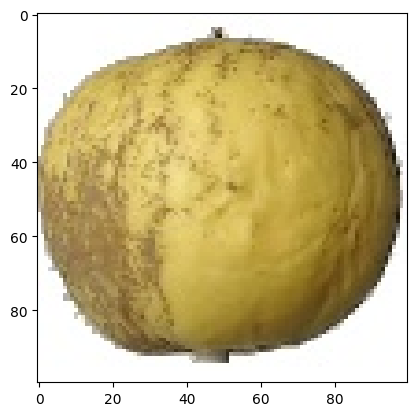

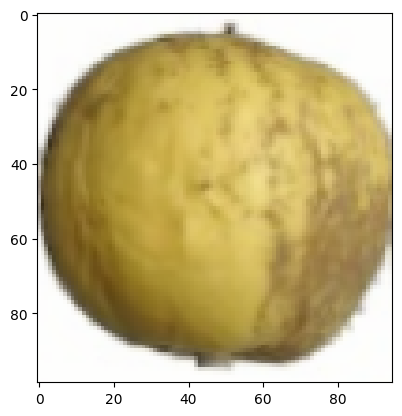

In [34]:
# visualising photos

target_class = random.choice(class_names)
target_dir = train_dir + target_class + "/"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + random_image

img = mpimg.imread(random_image_path)
aug_img = data_augmentation(img, training=True)

plt.imshow(img/255)
plt.figure()
plt.imshow(aug_img/255)

In [9]:
#turn on mixed precision training 
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy(policy="float32")
mixed_precision.global_policy()

<Policy "float32">

In [10]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224,224,3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="globalAvgPoolingLayer2D")(x)
x = layers.Dense(len(class_names))(x)

outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["categorical_accuracy"])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 globalAvgPoolingLayer2D (Gl  (None, 1280)             0         
 obalAveragePooling2D)                                           
                                                                 
 dense (Dense)               (None, 131)               167811    
                                                                 
 softmax_float32 (Activation  (None, 131)              0         
 )                                                               
                                                                 
Total params: 4,217,382
Trainable params: 167,811
Non-trainab

In [12]:
# create tensforboard callbacks (already have created "create tensorboarrd callbacks()" from a previous notebook)
from helper_functions import create_tensorboard_callback

#create modelCheckpoint to save model's progress
checkpoint_path = "../model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                     monitor="val_accuracy",
                                                     save_best_only=True,
                                                     save_weights_only=True,
                                                     verbose=0)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")


In [13]:
# data augmentation
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.1),
    preprocessing.RandomWidth(0.1),
    preprocessing.RandomZoom(0.1),
    preprocessing.RandomRotation(0.1),
    preprocessing.RandomContrast(0.1)
], name="data_augmentation")

In [35]:
def preprocess_image(img, label, image_shape=224):
    print(img)
    img = data_augmentation(img)
    img = tf.image.resize(img, (224, 224))
    img = img/255.
    return tf.data.Dataset.from_tensor_slices((img, label))


train_data = train_data.interleave(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=10000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = test_data.interleave(num_parallel_calls=tf.data.AUTOTUNE, map_func=preprocess_image)
test_data = test_data.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

Tensor("args_0:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("truediv:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("args_0:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("truediv:0", shape=(None, 224, 224, 3), dtype=float32)


In [18]:
history = model.fit(train_data,
                    epochs=15,
                    steps_per_epoch=int(2116/16),
                    validation_data=test_data,
                    validation_steps=int(0.25*709),
                    callbacks = [create_tensorboard_callback("training_logs", 
                                                           "efficientnetb0_101_classes_all_data_feature_extract"),
                                model_checkpoint,
                                reduce_lr,
                                early_stopping])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20230813-214033
Epoch 1/15
132/132 [==============================] - 26s 148ms/step - loss: 4.9305 - categorical_accuracy: 0.0142 - val_loss: 4.9507 - val_categorical_accuracy: 0.0078 - lr: 0.0010
Epoch 2/15
132/132 [==============================] - ETA: 0s - loss: 4.9314 - categorical_accuracy: 0.0125

INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


132/132 [==============================] - 73s 557ms/step - loss: 4.9314 - categorical_accuracy: 0.0125 - val_loss: 4.9365 - val_categorical_accuracy: 0.0069 - lr: 0.0010
Epoch 3/15
132/132 [==============================] - 110s 842ms/step - loss: 4.9380 - categorical_accuracy: 0.0123 - val_loss: 4.9520 - val_categorical_accuracy: 0.0155 - lr: 0.0010
Epoch 4/15
132/132 [==============================] - ETA: 0s - loss: 4.9475 - categorical_accuracy: 0.0095
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
132/132 [==============================] - 60s 455ms/step - loss: 4.9475 - categorical_accuracy: 0.0095 - val_loss: 4.9626 - val_categorical_accuracy: 0.0226 - lr: 0.0010
Epoch 5/15
132/132 [==============================] - ETA: 0s - loss: 4.8794 - categorical_accuracy: 0.0215

INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


132/132 [==============================] - 120s 916ms/step - loss: 4.8794 - categorical_accuracy: 0.0215 - val_loss: 4.8572 - val_categorical_accuracy: 0.0152 - lr: 2.0000e-04
Epoch 6/15
132/132 [==============================] - 67s 512ms/step - loss: 4.8598 - categorical_accuracy: 0.0121 - val_loss: 4.8606 - val_categorical_accuracy: 0.0117 - lr: 2.0000e-04
Epoch 7/15
132/132 [==============================] - ETA: 0s - loss: 4.8572 - categorical_accuracy: 0.0178
Epoch 7: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
132/132 [==============================] - 39s 294ms/step - loss: 4.8572 - categorical_accuracy: 0.0178 - val_loss: 4.8584 - val_categorical_accuracy: 0.0154 - lr: 2.0000e-04
Epoch 8/15
131/132 [============================>.] - ETA: 0s - loss: 4.8563 - categorical_accuracy: 0.0143

INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


132/132 [==============================] - 119s 908ms/step - loss: 4.8560 - categorical_accuracy: 0.0147 - val_loss: 4.8466 - val_categorical_accuracy: 0.0155 - lr: 4.0000e-05
Epoch 9/15
132/132 [==============================] - ETA: 0s - loss: 4.8496 - categorical_accuracy: 0.0123

INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


132/132 [==============================] - 106s 810ms/step - loss: 4.8496 - categorical_accuracy: 0.0123 - val_loss: 4.8412 - val_categorical_accuracy: 0.0152 - lr: 4.0000e-05
Epoch 10/15
131/132 [============================>.] - ETA: 0s - loss: 4.8369 - categorical_accuracy: 0.0160

INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


132/132 [==============================] - 59s 449ms/step - loss: 4.8373 - categorical_accuracy: 0.0159 - val_loss: 4.8401 - val_categorical_accuracy: 0.0159 - lr: 4.0000e-05
Epoch 11/15
132/132 [==============================] - ETA: 0s - loss: 4.8360 - categorical_accuracy: 0.0149

INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


INFO:tensorflow:Assets written to: ../model_checkpoints\cp.ckpt\assets


132/132 [==============================] - 94s 718ms/step - loss: 4.8360 - categorical_accuracy: 0.0149 - val_loss: 4.8389 - val_categorical_accuracy: 0.0157 - lr: 4.0000e-05
Epoch 12/15
132/132 [==============================] - 55s 416ms/step - loss: 4.8377 - categorical_accuracy: 0.0156 - val_loss: 4.8398 - val_categorical_accuracy: 0.0155 - lr: 4.0000e-05
Epoch 13/15
132/132 [==============================] - ETA: 0s - loss: 4.8411 - categorical_accuracy: 0.0149
Epoch 13: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
132/132 [==============================] - 20s 156ms/step - loss: 4.8411 - categorical_accuracy: 0.0149 - val_loss: 4.8402 - val_categorical_accuracy: 0.0154 - lr: 4.0000e-05
Epoch 14/15
132/132 [==============================] - 28s 216ms/step - loss: 4.8359 - categorical_accuracy: 0.0201 - val_loss: 4.8404 - val_categorical_accuracy: 0.0157 - lr: 8.0000e-06


In [20]:
result_one = model.evaluate(test_data)

709/709 [==============================] - 38s 53ms/step - loss: 4.8386 - categorical_accuracy: 0.0145


In [21]:
save_dir = "minor_project_categorical_accuracy"
model.save(save_dir)

INFO:tensorflow:Assets written to: minor_project_categorical_accuracy\assets


INFO:tensorflow:Assets written to: minor_project_categorical_accuracy\assets


In [22]:
loaded_model = tf.keras.models.load_model("minor_project_categorical_accuracy")

In [23]:
loaded_result = loaded_model.evaluate(test_data)

709/709 [==============================] - 41s 55ms/step - loss: 4.8386 - categorical_accuracy: 0.0145


In [25]:
# initialising y_labels
y_labels=[]
for image, label in test_data.unbatch():
    y_labels.append(int(tf.argmax(label)))
y_labels[:10]

[53, 99, 3, 32, 21, 34, 29, 74, 114, 36]

In [26]:
# y_labels that our model predicted
pred_prob = model.predict(test_data)
pred_classes = pred_prob.argmax(axis=1)
print(pred_classes)

709/709 [==============================] - 36s 50ms/step
[44 44 44 ... 44 44 44]


In [27]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.014456981664315938

In [28]:
pred_value = []
for i in pred_prob:
    pred_value.append(i.max())
pred_value[:3]

[0.015369687, 0.01599922, 0.015810855]

In [29]:
t_f = {
    "t":0,
    "f":0
}
for i in range(len(pred_prob)):
    if y_labels[i] == pred_classes[i]:
        t_f["t"] += 1
    else:
        t_f["f"] += 1
print(t_f)

{'t': 328, 'f': 22360}


In [30]:
# read image file
def load_prep_image(filename, img_shape=224, scale=True):
    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, [img_shape, img_shape])
    
    if scale:
        return img/255.
    else:
        return img

In [28]:
for i in range(3000):
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir+class_name))
    filepath = test_dir + class_name + "/" + filename
    print(filepath)
    
    img = load_prep_image(filepath, scale=False)
    pred_prob = model.predict(tf.expand_dims(img, axis=0), verbose=2)
    pred_class = class_names[pred_prob.argmax()]
    
    if class_name == pred_class:
        title_color="g"
    else:
        title_color="r"
        print(f"\n\n\nactual:{class_name}, pred:{pred_class}, prob:{pred_prob.max():.2f}\n\n\n")

fruits-360_dataset/fruits-360/test/Pepper Orange/r2_259_100.jpg
1/1 - 1s - 1s/epoch - 1s/step
fruits-360_dataset/fruits-360/test/Pear/98_100.jpg
1/1 - 0s - 10ms/epoch - 10ms/step
fruits-360_dataset/fruits-360/test/Lychee/2_100.jpg
1/1 - 0s - 30ms/epoch - 30ms/step
fruits-360_dataset/fruits-360/test/Rambutan/63_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Cherry Wax Black/238_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Tomato 1/r_6_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Pomelo Sweetie/r_103_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Pear 2/r2_81_100.jpg
1/1 - 0s - 36ms/epoch - 36ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 1/r_321_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Orange/58_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 1/r_61_100.jpg
1/1 - 0s - 18ms/epoch 

fruits-360_dataset/fruits-360/test/Pear Stone/r_204_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Nut Forest/r2_91_100.jpg
1/1 - 0s - 8ms/epoch - 8ms/step
fruits-360_dataset/fruits-360/test/Plum/75_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Strawberry Wedge/104_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Tomato Heart/r_139_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Onion Red Peeled/182_100.jpg
1/1 - 0s - 26ms/epoch - 26ms/step
fruits-360_dataset/fruits-360/test/Grapefruit Pink/104_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Onion Red Peeled/r_181_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Pear Kaiser/22_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Cherry 2/r2_298_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Cucumber Ripe/51_100

fruits-360_dataset/fruits-360/test/Pear Williams/r_116_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Cherry Rainier/151_100.jpg
1/1 - 0s - 30ms/epoch - 30ms/step
fruits-360_dataset/fruits-360/test/Maracuja/114_100.jpg
1/1 - 0s - 29ms/epoch - 29ms/step
fruits-360_dataset/fruits-360/test/Plum 3/r_184_100.jpg
1/1 - 0s - 5ms/epoch - 5ms/step
fruits-360_dataset/fruits-360/test/Pepper Yellow/r_230_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Cactus fruit/26_100.jpg
1/1 - 0s - 4ms/epoch - 4ms/step
fruits-360_dataset/fruits-360/test/Tomato 2/r2_0_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Banana Lady Finger/r_33_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Apple Red 3/r_86_100.jpg
1/1 - 0s - 6ms/epoch - 6ms/step
fruits-360_dataset/fruits-360/test/Pear Red/r_96_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Watermelon/r_92_100.jpg
1/1 - 0

1/1 - 0s - 36ms/epoch - 36ms/step
fruits-360_dataset/fruits-360/test/Pepper Red/r2_206_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Pepper Green/96_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Onion White/r2_7_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Grape White/r_88_100.jpg
1/1 - 0s - 28ms/epoch - 28ms/step
fruits-360_dataset/fruits-360/test/Strawberry Wedge/r_101_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Strawberry/8_100.jpg
1/1 - 0s - 35ms/epoch - 35ms/step
fruits-360_dataset/fruits-360/test/Lychee/69_100.jpg
1/1 - 0s - 33ms/epoch - 33ms/step
fruits-360_dataset/fruits-360/test/Pitahaya Red/190_100.jpg
1/1 - 0s - 33ms/epoch - 33ms/step
fruits-360_dataset/fruits-360/test/Cucumber Ripe 2/r_151_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Potato Sweet/176_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-

1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Cucumber Ripe 2/r_163_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Pepper Yellow/196_100.jpg
1/1 - 0s - 35ms/epoch - 35ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 2/81_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Apple Granny Smith/73_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Melon Piel de Sapo/r2_250_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 2/r_251_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Limes/229_100.jpg
1/1 - 0s - 5ms/epoch - 5ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 2/174_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Peach Flat/r_34_100.jpg
1/1 - 0s - 30ms/epoch - 30ms/step
fruits-360_dataset/fruits-360/test/Pomegranate/36_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_datase

fruits-360_dataset/fruits-360/test/Apple Red Delicious/r_176_100.jpg
1/1 - 0s - 27ms/epoch - 27ms/step
fruits-360_dataset/fruits-360/test/Pear Stone/r_33_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Pepper Orange/109_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Tamarillo/78_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Mango/r_211_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Pepper Orange/r_72_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Nectarine/4_100.jpg
1/1 - 0s - 36ms/epoch - 36ms/step
fruits-360_dataset/fruits-360/test/Tamarillo/301_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Fig/r_213_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Guava/40_100.jpg
1/1 - 0s - 27ms/epoch - 27ms/step
fruits-360_dataset/fruits-360/test/Raspberry/r_303_100.jpg
1/1 - 0s - 31ms/epoch 

1/1 - 0s - 33ms/epoch - 33ms/step
fruits-360_dataset/fruits-360/test/Clementine/74_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Potato Sweet/r_168_100.jpg
1/1 - 0s - 28ms/epoch - 28ms/step



actual:Potato Sweet, pred:Beetroot, prob:0.56



fruits-360_dataset/fruits-360/test/Nut Pecan/225_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Pear Monster/79_100.jpg
1/1 - 0s - 37ms/epoch - 37ms/step
fruits-360_dataset/fruits-360/test/Onion White/r2_5_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Tomato 4/164_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Mango/301_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Peach Flat/70_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Grape White/r_94_100.jpg
1/1 - 0s - 6ms/epoch - 6ms/step
fruits-360_dataset/fruits-360/test/Beetroot/r2_75_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/st

1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Corn Husk/87_100.jpg
1/1 - 0s - 30ms/epoch - 30ms/step
fruits-360_dataset/fruits-360/test/Onion Red Peeled/r_90_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Grapefruit Pink/r_211_100.jpg
1/1 - 0s - 33ms/epoch - 33ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 1/r_324_100.jpg
1/1 - 0s - 26ms/epoch - 26ms/step
fruits-360_dataset/fruits-360/test/Tangelo/r_167_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Dates/r_84_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Physalis/70_100.jpg
1/1 - 0s - 29ms/epoch - 29ms/step
fruits-360_dataset/fruits-360/test/Apple Red Delicious/228_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Rambutan/63_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Nut Forest/r_81_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360

1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Melon Piel de Sapo/287_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Lychee/r_27_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Limes/178_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Pear 2/20_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Grapefruit Pink/r_210_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 2/211_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Papaya/r_57_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Cherry Wax Yellow/273_100.jpg
1/1 - 0s - 27ms/epoch - 27ms/step
fruits-360_dataset/fruits-360/test/Strawberry/43_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Cherry Wax Black/219_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/tes

fruits-360_dataset/fruits-360/test/Pear Kaiser/140_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Cactus fruit/214_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Strawberry/r_94_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Cauliflower/r_299_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Tamarillo/r_190_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Avocado ripe/r_71_100.jpg
1/1 - 0s - 27ms/epoch - 27ms/step
fruits-360_dataset/fruits-360/test/Orange/86_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Cherry 2/77_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Physalis with Husk/31_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Apple Red 3/r_56_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Quince/r_42_100.jpg
1/1 - 0s - 23

fruits-360_dataset/fruits-360/test/Peach Flat/r_70_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Onion Red/180_100.jpg
1/1 - 0s - 26ms/epoch - 26ms/step
fruits-360_dataset/fruits-360/test/Onion Red Peeled/r2_0_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Grape White 2/279_100.jpg
1/1 - 0s - 30ms/epoch - 30ms/step
fruits-360_dataset/fruits-360/test/Lemon/r_185_100.jpg
1/1 - 0s - 35ms/epoch - 35ms/step
fruits-360_dataset/fruits-360/test/Plum 3/r_36_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 1/r_48_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Potato Sweet/95_100.jpg
1/1 - 0s - 28ms/epoch - 28ms/step
fruits-360_dataset/fruits-360/test/Apple Red 2/327_100.jpg
1/1 - 0s - 30ms/epoch - 30ms/step
fruits-360_dataset/fruits-360/test/Nut Pecan/r_27_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Mandarine/r_113_100.jpg
1/1 - 0s - 2

fruits-360_dataset/fruits-360/test/Cherry 1/r_53_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 2/55_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Apple Pink Lady/r_249_100.jpg
1/1 - 0s - 28ms/epoch - 28ms/step
fruits-360_dataset/fruits-360/test/Pear Abate/r_253_100.jpg
1/1 - 0s - 33ms/epoch - 33ms/step
fruits-360_dataset/fruits-360/test/Tangelo/115_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Blueberry/127_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Quince/136_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Peach/323_100.jpg
1/1 - 0s - 36ms/epoch - 36ms/step
fruits-360_dataset/fruits-360/test/Cocos/r_161_100.jpg
1/1 - 0s - 35ms/epoch - 35ms/step
fruits-360_dataset/fruits-360/test/Pear 2/r_251_100.jpg
1/1 - 0s - 28ms/epoch - 28ms/step
fruits-360_dataset/fruits-360/test/Fig/r_192_100.jpg
1/1 - 0s - 33ms/epoch - 33ms/step


fruits-360_dataset/fruits-360/test/Grape White 2/r_43_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Kumquats/2_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Pear Williams/289_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Apple Red Yellow 1/r_89_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Pear Forelle/r_191_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Apple Braeburn/r_76_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Mangostan/r_115_100.jpg
1/1 - 0s - 10ms/epoch - 10ms/step
fruits-360_dataset/fruits-360/test/Eggplant/r_91_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Beetroot/r_175_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Passion Fruit/115_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Tomato Yellow/13_100.

fruits-360_dataset/fruits-360/test/Apple Pink Lady/r_231_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Peach 2/r_298_100.jpg
1/1 - 0s - 34ms/epoch - 34ms/step
fruits-360_dataset/fruits-360/test/Potato Red/r2_198_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Corn/r_155_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step



actual:Corn, pred:Mandarine, prob:0.28



fruits-360_dataset/fruits-360/test/Tomato not Ripened/256_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Peach 2/r_2_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Tamarillo/r_327_100.jpg
1/1 - 0s - 31ms/epoch - 31ms/step
fruits-360_dataset/fruits-360/test/Apple Crimson Snow/130_100.jpg
1/1 - 0s - 27ms/epoch - 27ms/step
fruits-360_dataset/fruits-360/test/Hazelnut/64_100.jpg
1/1 - 0s - 27ms/epoch - 27ms/step
fruits-360_dataset/fruits-360/test/Tomato 2/r_183_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/

1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Mango/153_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Onion White/105_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Mango/r_211_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Onion Red Peeled/r_179_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Pepper Red/251_100.jpg
1/1 - 0s - 8ms/epoch - 8ms/step
fruits-360_dataset/fruits-360/test/Limes/144_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Cauliflower/183_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Peach 2/168_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Apple Braeburn/65_100.jpg
1/1 - 0s - 10ms/epoch - 10ms/step
fruits-360_dataset/fruits-360/test/Chestnut/r_0_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Redcurrant/26_100.




actual:Tomato Heart, pred:Pepper Red, prob:0.55



fruits-360_dataset/fruits-360/test/Cherry Wax Red/r_200_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Maracuja/18_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Tomato Yellow/1_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 1/143_100.jpg
1/1 - 0s - 13ms/epoch - 13ms/step
fruits-360_dataset/fruits-360/test/Onion Red/r_32_100.jpg
1/1 - 0s - 4ms/epoch - 4ms/step
fruits-360_dataset/fruits-360/test/Banana/160_100.jpg
1/1 - 0s - 9ms/epoch - 9ms/step
fruits-360_dataset/fruits-360/test/Pepper Green/r_168_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Mango Red/r_185_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 3/r_86_100.jpg
1/1 - 0s - 9ms/epoch - 9ms/step
fruits-360_dataset/fruits-360/test/Pomelo Sweetie/r_190_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dat

fruits-360_dataset/fruits-360/test/Papaya/r_72_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Potato Sweet/r2_71_100.jpg
1/1 - 0s - 10ms/epoch - 10ms/step
fruits-360_dataset/fruits-360/test/Quince/310_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Apple Red Delicious/r_14_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Watermelon/r_52_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Nut Forest/122_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Eggplant/142_100.jpg
1/1 - 0s - 5ms/epoch - 5ms/step
fruits-360_dataset/fruits-360/test/Corn/162_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Peach 2/r2_11_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Grape White 4/91_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Kiwi/r_87_100.jpg
1/1 - 0s - 12ms/epoch - 12ms/s

fruits-360_dataset/fruits-360/test/Pitahaya Red/r_153_100.jpg
1/1 - 0s - 10ms/epoch - 10ms/step
fruits-360_dataset/fruits-360/test/Physalis/r_21_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Kohlrabi/30_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Clementine/62_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Pineapple/r_221_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Kumquats/269_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Cherry 2/82_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Pear 2/10_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 1/r_323_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Raspberry/95_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Cherry Wax Black/214_100.jpg
1/1 - 0s - 20ms/epoch 

fruits-360_dataset/fruits-360/test/Onion Red Peeled/r_109_100.jpg
1/1 - 0s - 11ms/epoch - 11ms/step
fruits-360_dataset/fruits-360/test/Tangelo/80_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Physalis with Husk/r_116_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Plum 3/120_100.jpg
1/1 - 0s - 10ms/epoch - 10ms/step
fruits-360_dataset/fruits-360/test/Melon Piel de Sapo/r_138_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Potato Sweet/r_69_100.jpg
1/1 - 0s - 6ms/epoch - 6ms/step
fruits-360_dataset/fruits-360/test/Strawberry Wedge/r2_203_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Grape Blue/r_481_100.jpg
1/1 - 0s - 10ms/epoch - 10ms/step
fruits-360_dataset/fruits-360/test/Plum 3/r3_43_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Pear Monster/r_176_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Cucumber Ripe

fruits-360_dataset/fruits-360/test/Physalis with Husk/r_106_100.jpg
1/1 - 0s - 6ms/epoch - 6ms/step
fruits-360_dataset/fruits-360/test/Grape Pink/58_100.jpg
1/1 - 0s - 4ms/epoch - 4ms/step
fruits-360_dataset/fruits-360/test/Apple Red Yellow 1/r_7_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Orange/r_68_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Pear Stone/r2_5_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Apple Red Yellow 2/r2_187_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Huckleberry/r_226_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Grape White 2/300_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Pear Abate/r_319_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Mango/3_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Limes/237_100.jpg
1/1 

1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Mango/313_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Apricot/76_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Nectarine/r_41_100.jpg
1/1 - 0s - 6ms/epoch - 6ms/step
fruits-360_dataset/fruits-360/test/Cucumber Ripe/190_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Salak/266_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Grape Pink/r_91_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Cactus fruit/21_100.jpg
1/1 - 0s - 32ms/epoch - 32ms/step
fruits-360_dataset/fruits-360/test/Pear Stone/137_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Pomegranate/47_100.jpg
1/1 - 0s - 26ms/epoch - 26ms/step
fruits-360_dataset/fruits-360/test/Ginger Root/183_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Physalis/r_151_100.jp

fruits-360_dataset/fruits-360/test/Potato Red Washed/r2_75_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Fig/r2_115_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Kaki/r_186_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Strawberry/325_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Cactus fruit/246_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Plum 2/r_219_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Grape White 3/r_174_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Cherry Wax Red/257_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Pepper Red/246_100.jpg
1/1 - 0s - 8ms/epoch - 8ms/step
fruits-360_dataset/fruits-360/test/Kaki/r_199_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Corn Husk/252_100.jpg
1/1 - 0s - 18ms/epo

fruits-360_dataset/fruits-360/test/Cucumber Ripe 2/r_171_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Grapefruit Pink/r_192_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 2/r_220_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Grape White/244_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Apple Red Delicious/r_316_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Pomegranate/36_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Avocado/99_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Potato Red Washed/r2_69_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Nectarine Flat/71_100.jpg
1/1 - 0s - 5ms/epoch - 5ms/step
fruits-360_dataset/fruits-360/test/Peach 2/163_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Nut Forest/3

1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Kaki/r_85_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Banana/13_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Pear Red/r2_263_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Cocos/r_72_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Mango Red/r_275_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Onion White/84_100.jpg
1/1 - 0s - 14ms/epoch - 14ms/step
fruits-360_dataset/fruits-360/test/Strawberry Wedge/r_277_100.jpg
1/1 - 0s - 8ms/epoch - 8ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 3/40_100.jpg
1/1 - 0s - 5ms/epoch - 5ms/step
fruits-360_dataset/fruits-360/test/Carambula/163_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Nectarine Flat/r_4_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Cactus fruit/r_

fruits-360_dataset/fruits-360/test/Plum 3/r2_243_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Grape Blue/r_570_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Grape White 2/307_100.jpg
1/1 - 0s - 8ms/epoch - 8ms/step
fruits-360_dataset/fruits-360/test/Pear Monster/r_225_100.jpg
1/1 - 0s - 5ms/epoch - 5ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 2/54_100.jpg
1/1 - 0s - 9ms/epoch - 9ms/step
fruits-360_dataset/fruits-360/test/Dates/r_92_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Peach/r_94_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 1/79_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Pepper Red/r2_198_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Tomato 1/r_279_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Potato Red Washed/r_73_100.jpg
1/1 - 0s - 

1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 1/r_73_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Apple Red Yellow 1/73_100.jpg
1/1 - 0s - 12ms/epoch - 12ms/step
fruits-360_dataset/fruits-360/test/Cherry Wax Yellow/r_46_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Pear Red/122_100.jpg
1/1 - 0s - 11ms/epoch - 11ms/step
fruits-360_dataset/fruits-360/test/Clementine/111_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Cherry Wax Red/234_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Tamarillo/52_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Tomato 3/r2_305_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Blueberry/r_237_100.jpg
1/1 - 0s - 14ms/epoch - 14ms/step
fruits-360_dataset/fruits-360/test/Apple Red 3/7_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360

1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Huckleberry/157_100.jpg
1/1 - 0s - 6ms/epoch - 6ms/step
fruits-360_dataset/fruits-360/test/Lemon/4_100.jpg
1/1 - 0s - 5ms/epoch - 5ms/step
fruits-360_dataset/fruits-360/test/Limes/252_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 1/r_96_100.jpg
1/1 - 0s - 5ms/epoch - 5ms/step
fruits-360_dataset/fruits-360/test/Melon Piel de Sapo/r_19_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Apple Golden 3/311_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Pear/r_99_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Grape White 2/r_228_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Pear 2/286_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Banana/r_236_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Cherry 1/54_100.

fruits-360_dataset/fruits-360/test/Nut Forest/116_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Pepino/219_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 1/78_100.jpg
1/1 - 0s - 6ms/epoch - 6ms/step
fruits-360_dataset/fruits-360/test/Grape Pink/84_100.jpg
1/1 - 0s - 23ms/epoch - 23ms/step
fruits-360_dataset/fruits-360/test/Lemon/r_180_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Pineapple Mini/r_42_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Papaya/99_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Tomato Maroon/94_100.jpg
1/1 - 0s - 4ms/epoch - 4ms/step
fruits-360_dataset/fruits-360/test/Nut Pecan/r_11_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Mangostan/r_171_100.jpg
1/1 - 0s - 14ms/epoch - 14ms/step
fruits-360_dataset/fruits-360/test/Walnut/r2_100_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/st

1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Pomelo Sweetie/35_100.jpg
1/1 - 0s - 9ms/epoch - 9ms/step
fruits-360_dataset/fruits-360/test/Onion Red Peeled/19_100.jpg
1/1 - 0s - 8ms/epoch - 8ms/step
fruits-360_dataset/fruits-360/test/Mango Red/115_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Chestnut/r2_110_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Tomato 2/r_183_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Pear Williams/301_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Lemon/r_19_100.jpg
1/1 - 0s - 27ms/epoch - 27ms/step
fruits-360_dataset/fruits-360/test/Pomegranate/r_314_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Hazelnut/38_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Rambutan/199_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Pear Kaiser/

fruits-360_dataset/fruits-360/test/Cantaloupe 1/134_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Cocos/r_74_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Peach/68_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Strawberry/323_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Tomato Yellow/187_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Physalis with Husk/r_48_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Kiwi/92_100.jpg
1/1 - 0s - 24ms/epoch - 24ms/step
fruits-360_dataset/fruits-360/test/Strawberry Wedge/r_105_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Pear 2/r_249_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Lychee/r_322_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Granadilla/r_27_100.jpg
1/1 - 0s - 18ms/epoch 

fruits-360_dataset/fruits-360/test/Plum 2/r_233_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Dates/r_317_100.jpg
1/1 - 0s - 6ms/epoch - 6ms/step
fruits-360_dataset/fruits-360/test/Potato Red/r_184_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Mango/303_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Apple Red Yellow 2/r_234_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Peach/r_33_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Pepino/94_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Peach 2/118_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Tomato Cherry Red/r_294_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Peach 2/91_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Nectarine Flat/79_100.jpg
1/1 - 0s - 24ms/epoch - 24ms

fruits-360_dataset/fruits-360/test/Mulberry/217_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Cherry Rainier/r_21_100.jpg
1/1 - 0s - 9ms/epoch - 9ms/step
fruits-360_dataset/fruits-360/test/Passion Fruit/r_307_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step



actual:Passion Fruit, pred:Plum 3, prob:0.46



fruits-360_dataset/fruits-360/test/Melon Piel de Sapo/r2_264_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Beetroot/r2_73_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step



actual:Beetroot, pred:Pear Stone, prob:0.53



fruits-360_dataset/fruits-360/test/Potato Red Washed/r_95_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Avocado/99_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Grape White/83_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Apple Red Yellow 2/r2_204_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Oran

fruits-360_dataset/fruits-360/test/Orange/87_100.jpg
1/1 - 0s - 10ms/epoch - 10ms/step
fruits-360_dataset/fruits-360/test/Melon Piel de Sapo/275_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Nectarine Flat/60_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Watermelon/254_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Guava/r_155_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Salak/283_100.jpg
1/1 - 0s - 29ms/epoch - 29ms/step
fruits-360_dataset/fruits-360/test/Grapefruit White/r_35_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Cherry Wax Black/243_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Cactus fruit/195_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Physalis with Husk/185_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Avocado ripe/r_216_100.j

fruits-360_dataset/fruits-360/test/Walnut/r_319_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Avocado/r_89_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Apple Pink Lady/3_100.jpg
1/1 - 0s - 16ms/epoch - 16ms/step
fruits-360_dataset/fruits-360/test/Plum 3/r2_256_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Pineapple Mini/127_100.jpg
1/1 - 0s - 18ms/epoch - 18ms/step
fruits-360_dataset/fruits-360/test/Dates/r_93_100.jpg
1/1 - 0s - 8ms/epoch - 8ms/step
fruits-360_dataset/fruits-360/test/Tomato Maroon/r_36_100.jpg
1/1 - 0s - 19ms/epoch - 19ms/step
fruits-360_dataset/fruits-360/test/Grape Pink/38_100.jpg
1/1 - 0s - 17ms/epoch - 17ms/step
fruits-360_dataset/fruits-360/test/Apple Crimson Snow/r_18_100.jpg
1/1 - 0s - 22ms/epoch - 22ms/step
fruits-360_dataset/fruits-360/test/Apple Red 1/r_8_100.jpg
1/1 - 0s - 9ms/epoch - 9ms/step
fruits-360_dataset/fruits-360/test/Pear Red/r2_112_100.jpg
1/1 - 0s - 10m

fruits-360_dataset/fruits-360/test/Rambutan/r_169_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 2/r_175_100.jpg
1/1 - 0s - 7ms/epoch - 7ms/step
fruits-360_dataset/fruits-360/test/Banana Red/r_123_100.jpg
1/1 - 0s - 15ms/epoch - 15ms/step
fruits-360_dataset/fruits-360/test/Cantaloupe 2/218_100.jpg
1/1 - 0s - 20ms/epoch - 20ms/step
fruits-360_dataset/fruits-360/test/Grape Pink/59_100.jpg
1/1 - 0s - 25ms/epoch - 25ms/step
fruits-360_dataset/fruits-360/test/Tomato 3/r2_9_100.jpg
1/1 - 0s - 26ms/epoch - 26ms/step
fruits-360_dataset/fruits-360/test/Potato White/197_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Pear Monster/r_174_100.jpg
1/1 - 0s - 27ms/epoch - 27ms/step
fruits-360_dataset/fruits-360/test/Limes/r_45_100.jpg
1/1 - 0s - 35ms/epoch - 35ms/step
fruits-360_dataset/fruits-360/test/Peach 2/r_202_100.jpg
1/1 - 0s - 21ms/epoch - 21ms/step
fruits-360_dataset/fruits-360/test/Strawberry Wedge/r2_180_100.jpg
1/1 - 0s

In [31]:
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

    
  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

[107, 96, 120, 79, 51, 71, 20, 19, 68, 90]

709/709 [==============================] - 36s 50ms/step


array([ 18,  33,  33,  32,  20,  96,  32, 115,  83,  94], dtype=int64)

In [32]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.00      0.00      0.00       148
           2       0.00      0.00      0.00       160
           3       0.00      0.00      0.00       164
           4       0.00      0.00      0.00       161
           5       0.00      0.00      0.00       164
           6       0.00      0.00      0.00       152
           7       0.00      0.00      0.00       164
           8       0.00      0.00      0.00       164
           9       0.00      0.00      0.00       144
          10       0.00      0.00      0.00       166
          11       0.00      0.00      0.00       164
          12       0.00      0.00      0.00       219
          13       0.00      0.00      0.00       164
          14       0.00      0.00      0.00       143
          15       0.00      0.00      0.00       166
          16       0.00      0.00      0.00       166
          17       0.00    

C:\Users\ronak\anaconda3\envs\first\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ronak\anaconda3\envs\first\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ronak\anaconda3\envs\first\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
